<h1><center>COMS7047A Term Project: Swahili News Classification</center></h1> 

<img src="./wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  2021</center></h4>

In [130]:
#----INSTALL LIBRARIES----#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split 
%matplotlib inline

## Data Import
The chosen dataset involves factors affecting medical insurance costs where costs are predicted based on variables such as *age, sex, bmi, children, smoker, region* and *charges*. The dataset was obtained from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

In [131]:
#----IMPORT DATA----#
data_path = "./train.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 10 rows of the dataframe") 
df.head(10)

The first 10 rows of the dataframe


,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa
5,SW30734,MAJADILIANO kati ya aliyekuwa Mkurugenzi wa z...,kitaifa
6,SW28096,Mwandishi\nWetu – butiama MKUU wa majeshi\nmst...,kitaifa
7,SW1223,['Huenda Manchester United ikasubiri ukaguzi w...,michezo
8,SW20534,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi
9,SW9193,"RAIS wa Zanzibar, Dk Ali Mohamed Shein amewat...",kitaifa


## Data Preparation

In [132]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
False    23268
Name: id, dtype: int64

content
False    23268
Name: content, dtype: int64

category
False    23268
Name: category, dtype: int64



In [133]:
#----TEXT PRE-PROCESSING----#

# 1. Tokenize
# 2. Lowercase

# 3. Remove stopwords


# 4. Remove punctuation (for now and then revisit if it is helpful)
# 5. Stemming

In [134]:
sample = df["content"].values[0]

In [135]:
#----LOWERCASE----#
# Check that this step is actually helpful
sample = sample.lower()
print (sample)

 bodi ya utalii tanzania (ttb) imesema, itafanya misafara ya kutangaza utalii kwenye miji minne nchini china kati ya juni 19 hadi juni 26 mwaka huu.misafara hiyo itatembelea miji ya beijing juni 19, shanghai juni 21, nanjig juni 24 na changsha juni 26.mwenyekiti wa bodi ttb, jaji mstaafu thomas mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini dar es salaam.“tunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka china hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini,” amesema jaji mihayo.novemba 2018 ttb ilifanya ziara kwenye miji ya beijing, shanghai, chengdu, guangzhou na hong kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za air tanzania.ziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya 300 kuja nchini mei mwaka huu kutembelea vivutio vya utalii.


In [136]:
#----REMOVE PUNCTUATION----#
punctuation_list = ".!?," # add quotations and brackets?
for punc in punctuation_list:
    sample = sample.replace(punc, "")
print (sample)
#no_punc = df["content"].values[0].replace(",", " ")

 bodi ya utalii tanzania (ttb) imesema itafanya misafara ya kutangaza utalii kwenye miji minne nchini china kati ya juni 19 hadi juni 26 mwaka huumisafara hiyo itatembelea miji ya beijing juni 19 shanghai juni 21 nanjig juni 24 na changsha juni 26mwenyekiti wa bodi ttb jaji mstaafu thomas mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini dar es salaam“tunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka china hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini” amesema jaji mihayonovemba 2018 ttb ilifanya ziara kwenye miji ya beijing shanghai chengdu guangzhou na hong kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za air tanzaniaziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya 300 kuja nchini mei mwaka huu kutembelea vivutio vya utalii


In [137]:
#----TOKENIZE----#
sample = sample.split(" ")
print(sample)

['', 'bodi', 'ya', 'utalii', 'tanzania', '(ttb)', 'imesema', 'itafanya', 'misafara', 'ya', 'kutangaza', 'utalii', 'kwenye', 'miji', 'minne', 'nchini', 'china', 'kati', 'ya', 'juni', '19', 'hadi', 'juni', '26', 'mwaka', 'huumisafara', 'hiyo', 'itatembelea', 'miji', 'ya', 'beijing', 'juni', '19', 'shanghai', 'juni', '21', 'nanjig', 'juni', '24', 'na', 'changsha', 'juni', '26mwenyekiti', 'wa', 'bodi', 'ttb', 'jaji', 'mstaafu', 'thomas', 'mihayo', 'ameyasema', 'hayo', 'kwenye', 'mkutano', 'na', 'waandishi', 'wa', 'habari', 'jijini', 'dar', 'es', 'salaam“tunafanya', 'jitihada', 'kuhakikisha', 'tunavuna', 'watalii', 'wengi', 'zaidi', 'kutoka', 'china', 'hasa', 'tukizingatia', 'umuhimu', 'wa', 'soko', 'la', 'sekta', 'ya', 'utalii', 'nchini”', 'amesema', 'jaji', 'mihayonovemba', '2018', 'ttb', 'ilifanya', 'ziara', 'kwenye', 'miji', 'ya', 'beijing', 'shanghai', 'chengdu', 'guangzhou', 'na', 'hong', 'kong', 'kutangaza', 'vivutio', 'vya', 'utalii', 'sanjari', 'kuzitangaza', 'safari', 'za', 'ndege

In [138]:
#----REMOVE STOPWORDS----#

data_path = "./stopwords.csv" # additional data from Mendeley data
stopword_data = pd.read_csv(data_path) #read in data

stopword_list = stopword_data["StopWords"].values
print(stopword_list)

['na' 'lakini' 'ingawa' 'ingawaje' 'kwa' 'sababu' 'hadi' 'hata' 'kama'
 'ambapo' 'ambamo' 'ambako' 'ambacho' 'ambao' 'ambaye' 'ilhali' 'ya'
 'yake' 'yao' 'yangu' 'yetu' 'yenu' 'vya' 'vyao' 'vyake' 'vyangu' 'vyenu'
 'vyetu' 'yako' 'yao' 'hizo' 'yenu' 'mimi' 'sisi' 'wewe' 'nyinyi' 'yeye'
 'wao' 'nao' 'nasi' 'nanyi' 'ni' 'alikuwa' 'atakuwa' 'hii' 'hizi' 'zile'
 'ile' 'hivi' 'vile' 'za' 'zake' 'zao' 'zenu' 'kwenye' 'katika' 'kwa'
 'kwao' 'kwenu' 'kwetu' 'dhidi' 'kati' 'miongoni' 'katikati' 'wakati'
 'kabla' 'baada' 'baadaye' 'nje' 'tena' 'mbali' 'halafu' 'hapa' 'pale'
 'mara' 'mara' 'yoyote' 'wowote' 'chochote' 'vyovyote' 'yeyote' 'lolote'
 'mwenye' 'mwenyewe' 'lenyewe' 'lenye' 'wote' 'lote' 'vyote' 'nyote'
 'kila' 'zaidi' 'hapana' 'ndiyo' 'au' 'ama' 'ama' 'sio' 'siye' 'tu' 'budi'
 'nyingi' 'nyingine' 'wengine' 'mwingine' 'zingine' 'lingine' 'kingine'
 'chote' 'sasa' 'basi' 'bila' 'cha' 'chini' 'hapo' 'pale' 'huku' 'kule'
 'humu' 'hivyo' 'hivyohivyo' 'vivyo' 'palepale' 'fauka' 'hiyo' 'hiyo

In [139]:
# list comprehension  
sample = [word for word in sample if word not in stopword_list]
print(sample)

['', 'bodi', 'utalii', 'tanzania', '(ttb)', 'imesema', 'itafanya', 'misafara', 'kutangaza', 'utalii', 'miji', 'minne', 'nchini', 'china', 'juni', '19', 'juni', '26', 'mwaka', 'huumisafara', 'itatembelea', 'miji', 'beijing', 'juni', '19', 'shanghai', 'juni', '21', 'nanjig', 'juni', '24', 'changsha', 'juni', '26mwenyekiti', 'bodi', 'ttb', 'jaji', 'mstaafu', 'thomas', 'mihayo', 'ameyasema', 'hayo', 'mkutano', 'waandishi', 'habari', 'jijini', 'dar', 'es', 'salaam“tunafanya', 'jitihada', 'kuhakikisha', 'tunavuna', 'watalii', 'wengi', 'china', 'tukizingatia', 'umuhimu', 'soko', 'sekta', 'utalii', 'nchini”', 'amesema', 'jaji', 'mihayonovemba', '2018', 'ttb', 'ilifanya', 'ziara', 'miji', 'beijing', 'shanghai', 'chengdu', 'guangzhou', 'hong', 'kong', 'kutangaza', 'vivutio', 'utalii', 'sanjari', 'kuzitangaza', 'safari', 'ndege', 'air', 'tanzaniaziara', 'inaelezwa', 'kuzaa', 'matunda', 'ikiwa', 'watalii', '300', 'kuja', 'nchini', 'mei', 'mwaka', 'kutembelea', 'vivutio', 'utalii']


In [ ]:
# need to remove \n characters! and split words joined by these

In [140]:
# numbers - probably add meaning especially for finance/economic - replace with keyword NUM? 
# or replace dates with DATE?
#

In [150]:
# create one method to perform data cleaning steps
def process_sample(sample, stopword_list):
    
     # lowercase
    sample = sample.lower()
    
    # remove punctuation
    punctuation_list = ".!?," 
    for punc in punctuation_list:
        sample = sample.replace(punc, "") # does this replace all? do list comprehension instead somehow?
    
    # tokenize   
    sample = sample.split(" ") 
    
    # remove stopwords
    sample = [word for word in sample if word not in stopword_list]
    return sample
    

## Data Exploration

In [141]:
#  Understanding the characteristics of your data beforehand will enable you to build a better model. 
# This could simply mean obtaining a higher accuracy. 
# It could also mean requiring less data for training, or fewer computational resources.


In [142]:
#----KEY METRICS----#
# 1. Number of samples: Total number of examples you have in the data.
# 2. Number of classes: Total number of topics or categories in the data.
# 3. Number of samples per class: Number of samples per class (topic/category). In a balanced dataset, all classes will have a similar number of samples; in an imbalanced dataset, the number of samples in each class will vary widely.
# 4. Number of words per sample: Median number of words in one sample.
# 5. Frequency distribution of words: Distribution showing the frequency (number of occurrences) of each word in the dataset.
# 6. Distribution of sample length: Distribution showing the number of words per sample in the dataset.

In [143]:
#----NO. OF SAMPLES AND CLASSES----#

# No. of samples
print("No. of Samples: {}". format(df.shape[0]))

# No. of classes
print("No. of Classes: {}". format(len(np.unique(df["category"]))))

No. of Samples: 23268
No. of Classes: 6


kitaifa      10242
michezo       6004
burudani      2229
uchumi        2028
kimataifa     1906
afya           859
Name: category, dtype: int64


Text(0.5, 0, 'New Category')

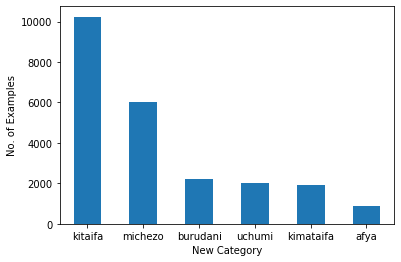

In [144]:
#----DISTRIBUTION OF TARGET VARIABLE----#

#Visualise target variable: news category
# No. of samples per class

# Six different topics
# kitaifa - Local/National News
# michezo - Sports News
# burudani - Entertainment News
# uchumi - Finance/Economic News
# kimataifa - International News
# afya - Health News

target_counts = df['category'].value_counts()
print(target_counts)
ax = target_counts.plot.bar(x='lab', y='val', rot=0)
plt.ylabel("No. of Examples")
plt.xlabel("New Category")

In [145]:
# NB is this an imbalanced data set and what can be done about it

Median No. of Words Per Sample: 1830.0


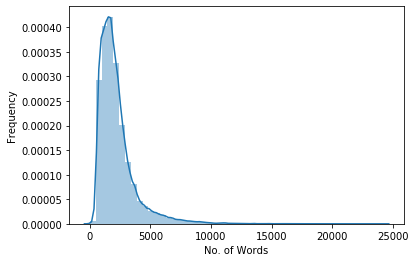

In [146]:
#---MEDIAN NUMBER OF WORDS PER SAMPLE---#

lengths = [len(sample) for sample in df["content"].values]
median_length = np.median(lengths)
print("Median No. of Words Per Sample: {}". format(median_length))
sns_plot = sns.distplot(lengths);
sns_plot.set(xlabel = 'No. of Words', ylabel = "Frequency")
plt.show()

17828
17327
Median No. of Words Per Sample (No Outliers): 1830.0


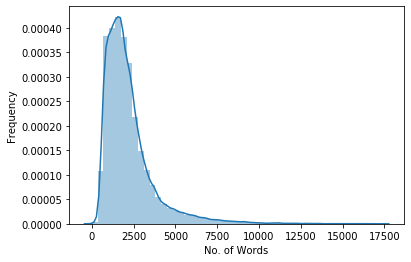

In [149]:
#---MEDIAN NUMBER OF WORDS PER SAMPLE (No outliers)---#

# do outliers properly - with std dev or something

lengths_no_outliers = lengths
maximum = np.max(lengths_no_outliers)
print(maximum)
lengths_no_outliers.remove(int(maximum))
print(np.max(lengths_no_outliers))
median_length_no_outliers = np.median(lengths_no_outliers)
print("Median No. of Words Per Sample (No Outliers): {}". format(median_length_no_outliers))
sns_plot = sns.distplot(lengths_no_outliers);
sns_plot.set(xlabel = 'No. of Words', ylabel = "Frequency")
plt.show()

In [152]:
#---FREQUENCY DISTRIBUTION OF WORDS---#

# make a dictionary of words and count their frequencies?
# optimise this with python optimization and list comprehension
vocabulary = []
for sample in df['content'].values[0:50]:
    sample = process_sample(sample, stopword_list)
    for word in sample:
        if word not in vocabulary:
            vocabulary.append(word)
print(vocabulary)

['', 'bodi', 'utalii', 'tanzania', '(ttb)', 'imesema', 'itafanya', 'misafara', 'kutangaza', 'miji', 'minne', 'nchini', 'china', 'juni', '19', '26', 'mwaka', 'huumisafara', 'itatembelea', 'beijing', 'shanghai', '21', 'nanjig', '24', 'changsha', '26mwenyekiti', 'ttb', 'jaji', 'mstaafu', 'thomas', 'mihayo', 'ameyasema', 'hayo', 'mkutano', 'waandishi', 'habari', 'jijini', 'dar', 'es', 'salaam“tunafanya', 'jitihada', 'kuhakikisha', 'tunavuna', 'watalii', 'wengi', 'tukizingatia', 'umuhimu', 'soko', 'sekta', 'nchini”', 'amesema', 'mihayonovemba', '2018', 'ilifanya', 'ziara', 'chengdu', 'guangzhou', 'hong', 'kong', 'vivutio', 'sanjari', 'kuzitangaza', 'safari', 'ndege', 'air', 'tanzaniaziara', 'inaelezwa', 'kuzaa', 'matunda', 'ikiwa', '300', 'kuja', 'mei', 'kutembelea', 'pendo', 'fundisha-mbeya', 'rais', 'dk', 'john', 'magufuri', 'ametangaza', 'kuwafukuza\nkazi', 'wakurugenzi', 'halmashauri', 'watabainika', 'kukiuka', 'sheria', 'ya\nufutaji', 'tozo', 'ushuru', 'mazao', 'alisema', 'kuingia', 'm

In [ ]:
# Create Document Term Matrix

In [ ]:
# NB what are the steps to explore textual data ?

In [ ]:
#----NOTES----#

# Think of ways to extend project and make it really good
# Can we make it into a generic Python library?
# Can we add to it e.g. add sentiment analysis in some way?
# Can we compare approaches?
# Can we extend to other languages/multi-lingual?